# Ejemplo de derivadas numéricas y del error
**Objetivo general**
- Mediante un ejemplo revisar e implementar conceptos de derivada e integral. Comparar resultados numéricos con fórmulas exactas.

**Objetivos particulares**
- Revisar algunos conceptos de arreglos y numpy.
- Graficar usando las funciones `plot()` y `bar()`.
- Implementar las fórmulas del error absoluto y relativo.
- Hacer uso de sympy para el cálculo de integrales.


## Contenido
- [1 - Masa y densidad.](#1)
    - [Ejercicio 1. Definir los arreglos de `numpy` para las secciones de la varilla.](#ej-1)
    - [Ejercicio 2. Calcular la masa total de la varilla.](#ej-2)
    - [Ejercicio 3. Calcular la densidad (lineal) de la varilla.](#ej-3)
    - [Ejercicio 4. Calcular la densidad exacta.](#ej-4)
    - [Ejercicio 5. Error absoluto y error relativo.](#ej-5)
    - [Ejercicio 6. Fórmula exacta para la masa.](#ej-6)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluacion import Quizz
quizz = Quizz('Derivada', 'DerivadasNumericas')

<a name='1'></a>
## Masa y densidad

Un experimentado maestro albañil, necesita cortar una varilla de metal en varias secciones para construir una escalera. Realiza las marcas de la varilla y se ven como en la siguiente figura:

<img src="../utils/fig/secciones.png">


Como se observa, el tamaño de cada sección de la varilla es de 0.5 m. Por razones de la estructura, se necesita conocer el peso de cada sección de la varilla para evitar que la escalera se derrumbe. El maestro albañil realizó los cortes y pesó cada sección, obteniendo los siguientes resultados:

| Sección | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
| Masa [Kg] | 0.595 | 0.806 | 0.369 | 1.078 | 1.704 | 1.475 | 2.263 |  3.282 |


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Definir los arreglos de `numpy` para las secciones de la varilla.</font>**

<font color="DarkBlue">Construya dos arreglos de numpy como sigue: 
    
a. `secciones` : para almacenar las marcas hechas en la varillas, comenzando en $0$ y terminando en $4.0$.
    
b.  `masas_sec`: para almacenar el valor de la masa de cada sección. </font>

---

In [2]:
# Hint:
# secciones = np.array([...])
# masas_sec = np.array([...])

### BEGIN SOLUTION
# Marcas sobre la varilla de cada sección
secciones = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,  4.0]) 

# Peso de cada sección [kg]
masas_sec = np.array([0.595, 0.806, 0.369, 1.078, 1.704, 1.475, 2.263,  3.282])
### END SOLUTION

In [3]:
quizz.verifica('2','1a',secciones)

¡Tu resultado es correcto!


In [4]:
quizz.verifica('2','1b',masas_sec)

¡Tu resultado es correcto!


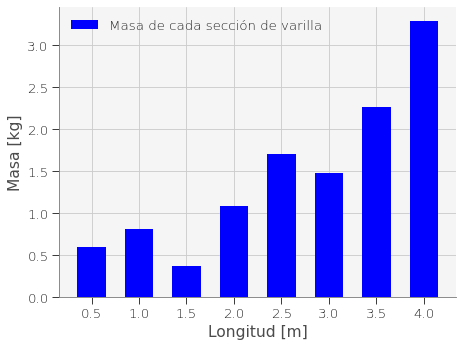

In [26]:
# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(secciones[1:], masas_sec, 
        width=0.3, color='b', 
        label='Masa de cada sección de varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.show()


---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Calcular la masa total de la varilla.</font>**

<font color="DarkBlue">Escriba un código que genere el arreglo de numpy `masa` con zeros, del mismo tamaño que el arreglo `secciones`. En la primera posición del arreglo `masa` deje el valor de cero; en la segunda posición ponga el valor de la masa de la primera sección; en la tercera posición el valor de la primera sección, más el valor de la masa de la segunda sección; y así sucesivamente hasta obtener el peso total de la varilla en la última posición. Diseñe un algoritmo para realizar este proceso y escríbalo en la siguiente celda.</font>

---


In [6]:
### BEGIN SOLUTION
masa = np.zeros(len(secciones))
for i, ms in enumerate(masas_sec):
    masa[i+1] = masa[i] + ms
### END SOLUTION

In [7]:
quizz.verifica('2', '2', masa)

¡Tu resultado es correcto!


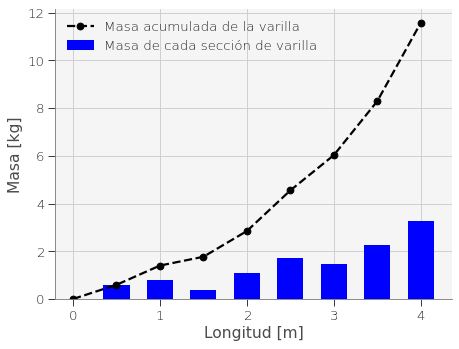

In [27]:
# Gráfica de la masa como función de la posición
plt.plot(secciones, masa, 
         'o--', label='Masa acumulada de la varilla')

# Gráfica de la masa para cada sección en forma de barras verticales.
plt.bar(secciones[1:], masas_sec, 
        width=0.3, color='b', 
        label='Masa de cada sección de varilla')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.show()

Si todo se hizo correctamente, se verá que la masa no crece linealmente. Se sospecha que la densidad de la varilla no cambia homogéneamente en toda su longitud. Suponemos que todo está en una dimensión, de tal manera que podemos definir una densidad *lineal* de la siguiente manera:

$$
\rho(x) = \frac{\text{Masa}}{Longitud} = \frac{m}{l}
$$

Recordemos que la masa es una **propiedad extensiva**: es directamente proporcional al tamaño del sistema o a la cantidad de material, mientras que la densidad es una **propiedad intensiva**: no depende del tamaño del sistema, es invariante a la escala.
Si observamos con atención, esta densidad se puede calcular por cada sección, vea la figura:

<img src="../utils/fig/secciones_mi.png">


$\rho_i = \dfrac{m_i}{l_i}$ para $i = 0,1,2, \dots$ donde $m_i$ es la masa de la sección y $l_i$ su longitud.

Si observamos con más atención, la densidad de la sección $i$ se puede obtener mediante la siguiente aproximación:

$\rho_i \approx \dfrac{m_{i} - m_{i-1}}{l_{i} - l_{i-1}} = \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} $

La fórmula anterior, cuando $\delta l_{i} \to 0$, representa una derivada:

$$
\rho_i = \lim_{\delta l_{i} \to 0} \dfrac{m_{i} - m_{i-1}}{\delta l_{i}} = \dfrac{d}{d x}\Big(m (x)\Big) \tag{1}
$$


---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Calcular la densidad (lineal) de la varilla.</font>**

<font color="DarkBlue">En la siguiente celda, escriba la función `derivada(masa, secciones)` para calcular la densidad de la varilla para cada sección usando la aproximación de la fórmula $(1)$. Esta función debe regresar un arreglo con los valores de la densidad para cada sección.</font>

---

In [9]:
### BEGIN SOLUTION
derivada = lambda m, l : [(m[i] - m[i-1]) / (l[i] - l[i-1]) for i in range(1,len(l))]
### END SOLUTION

densidad = derivada(masa, secciones)

In [10]:
quizz.verifica('2','3',densidad)

¡Tu resultado es correcto!


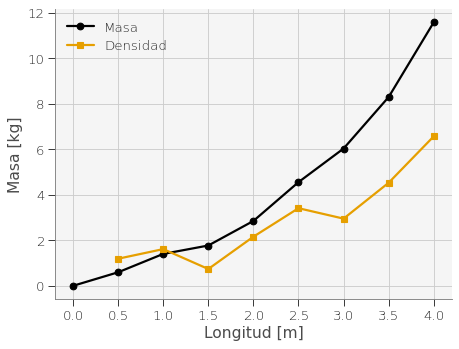

In [30]:
# Gráfica de la masa y de la densidad para cada sección
plt.plot(secciones, masa, 'o-', label='Masa')
plt.plot(secciones[1:], densidad,'s-', label='Densidad')
plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.show()

Después de una búsqueda sobre las especificaciones de la varilla, se encuentra que la densidad está dada por siguiente fórmula:

$$
\rho = (1000 x^2 + 5000 \sin(2x)^2 ) A \tag{2}
$$

donde $x$ es la posición en la varilla y $A$ es el área transversal de la misma. Al medir el diámetro de la varilla se encuentra el valor de $d = 0.02$ m , por lo tanto el radio es $r = 0.01$ m.

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Calcular la densidad exacta.</font>**

<font color="DarkBlue">Implemente la fórmula de la densidad $(2)$ en la función `calc_densidad(x)` y evalue dicha fórmula con los datos del radio antes definido. Posteriormente compare gráficamente el resultado con la aproximación realizada en el ejercicio anterior.</font>

---

In [12]:
### BEGIN SOLUTION
calc_densidad = lambda x: (1000 * x**2 + 5000 * np.sin(2*x)**2 ) * A
### END SOLUTION

In [13]:
r = 0.01
A = np.pi * r ** 2
x = np.arange(0.0, 4.5, .1)

# Cálculo de la densidad en cada posición del arreglo x 
ρ = [calc_densidad(l) for l in x]

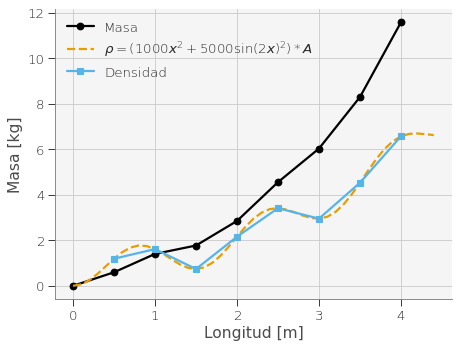

In [14]:
# Gráfica de la masa como función de las secciones
plt.plot(secciones, masa, 'o-', label='Masa')

# Gráfica de la densidad exacta
plt.plot(x, ρ, '--', label = '$\\rho =(1000 x^2 + 5000 \sin(2x)^2 ) * A $')

# Gráfica de la densidad como función de las secciones
plt.plot(secciones[1:], densidad,'s-', label='Densidad')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.show()

Para evaluar la aproximación, se puede usar el error absoluto y el error relativo los cuales se definen como sigue.</font>

$$
\begin{eqnarray*}
Error_{absoluto} & = & ||v_e - v_a|| \\ \\
Error_{relativo} & = & \dfrac{||v_e - v_a||}{||v_e||}
\end{eqnarray*}
$$

donde $v_e$ es el valor exacto y $v_a$ es el valor aproximado.

---
<a name='ej-5'></a>
### **<font color="DodgerBlue">Ejercicio 5. Error absoluto y error relativo.</font>**

<font color="DarkBlue">Implemente las fórmulas del error absoluto y relativo en las funciones `error_absoluto(ve, va)` y `error_relativo(ve, va)` respectivamente.</font>

- 5a. Calcular el valor de la densidad con la fórmula (2) para cada sección.
- 5b. Comparar la aproximación (1) con el resultado del inciso anterior usando el error absoluto.
- 5c. Comparar la aproximación (1) con el resultado del inciso anterior usando el error relativo.

---

In [15]:
### BEGIN SOLUTION
error_absoluto = lambda e, a: np.fabs(e - a)
error_relativo = lambda e, a: np.fabs(e - a) / np.fabs(e)
### END SOLUTION

In [16]:
# Calculamos la densidad en cada sección con la fórmula (2)
densidad_e = calc_densidad(secciones[1:])

In [17]:
quizz.verifica('2', '5a', densidad_e)

¡Tu resultado es correcto!


In [18]:
# Calculamos los errores con respecto de la aproximación
error_a = []
error_r = []
for e,a in zip(densidad_e, densidad):
    error_a.append(error_absoluto(e,a))
    error_r.append(error_relativo(e,a))

In [19]:
quizz.verifica('2', '5b', error_a)

¡Tu resultado es correcto!


In [20]:
quizz.verifica('2', '5c', error_r)

¡Tu resultado es correcto!


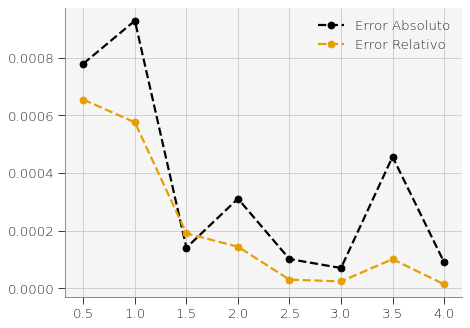

In [21]:
# Gráficas del error absoluto y del error relativo
plt.plot(secciones[1:], error_a, 'o--', label='Error Absoluto')
plt.plot(secciones[1:], error_r, 'o--', label='Error Relativo')
plt.legend()
plt.show()

Si tenemos la fórmula de la densidad, ecuación $(2)$, podemos encontrar la fórmula para la masa haciendo la integral de la densidad.

$$
m(x) = \int \rho = (1000 x^2 + 5000 \sin(2x)^2 ) * A \; dx = ¿? \tag{3}
$$


---
<a name='ej-6'></a>
### **<font color="DodgerBlue">Ejercicio 6. Fórmula exacta para la masa.</font>**

<font color="DarkBlue">Cálcule la integral $(3)$. Posteriormente calcule la masa para cada sección usando la fórmula antes calculada. Compare el resultado gráficamente con los datos de la masa calculados al inicio.</font>

---

**NOTA**. Puede usar Sympy para calcular la integral.

In [22]:
# Usa sympy para calcular la integral (3)

### BEGIN SOLUTION
from sympy import integrate, Symbol, sin
x = Symbol('x')
integrate(1000 * x**2 + 5000 * sin(2*x)**2, x)
### END SOLUTION

1000*x**3/3 + 2500*x - 1250*sin(2*x)*cos(2*x)

In [23]:
# Calcula la masa usando la fórmula exacta obtenida anteriormente.

### BEGIN SOLUTION
calc_masa = lambda x: (1000 * x**3 / 3 + 2500*x - 1250 * np.sin(2*x) * np.cos(2*x) ) * A
x = np.arange(0.0, 4.5, .1)
m = [calc_masa(l) for l in x]
### END SOLUTION

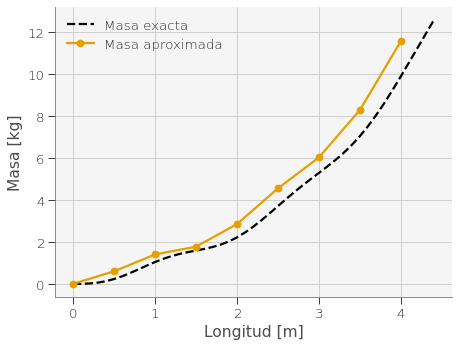

In [24]:
# Gráfica de la masa exacta y de la aproximada
plt.plot(x, m, 'C0--', label = 'Masa exacta')
plt.plot(secciones, masa, 'C1o-', label='Masa aproximada')

plt.xlabel('Longitud [m]')
plt.ylabel('Masa [kg]')
plt.legend()
plt.show()